In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('rent_features.csv')
df.head()

,Unnamed: 0,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,0,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,9/10/2017 12:48,12.929557,77.672280,ANYONE,0,1,...,0,1,1,0,1,1,1,0,1,1
1,1,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12/6/2018 22:02,12.982870,80.262012,FAMILY,0,1,...,0,0,1,0,1,0,0,0,1,1
2,2,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,...,0,0,0,0,1,0,0,0,0,1
4,4,ff8081815f48e4aa015f4dd1a9c6696b,BHK1,"Seetharampalya,Hoodi",24-10-2017 18:29,12.986196,77.718314,FAMILY,1,1,...,0,1,0,0,0,0,0,0,1,0


In [3]:
df.dtypes

Unnamed: 0           int64
id                  object
type                object
locality            object
activation_date     object
latitude           float64
longitude          float64
lease_type          object
gym                  int64
lift                 int64
swimming_pool        int64
negotiable           int64
furnishing          object
parking             object
property_size        int64
property_age       float64
bathroom           float64
facing              object
cup_board          float64
floor              float64
total_floor        float64
water_supply        object
building_type       object
balconies          float64
rent               float64
rent_level          object
LIFT                 int64
GYM                  int64
INTERNET             int64
AC                   int64
CLUB                 int64
INTERCOM             int64
POOL                 int64
CPA                  int64
FS                   int64
SERVANT              int64
SECURITY             int64
S

In [4]:
df['total_amenities_count_1']=df['LIFT']+df['GYM']+df['INTERNET']+df['AC']+df['CLUB']+df['INTERCOM']+df['POOL']+df['CPA']+df['FS']+df['SERVANT']+df['SECURITY']+df['SC']+df['GP']+df['PARK']+df['RWH']+df['STP']+df['HK']+df['PB']+df['VP']
                           

## 1. Correlation Analysis:
- How does the number of bedrooms and bathrooms affect the rent price?
- Is there a correlation between the property size and rent price?
- Do properties with more amenities tend to have higher rent prices?

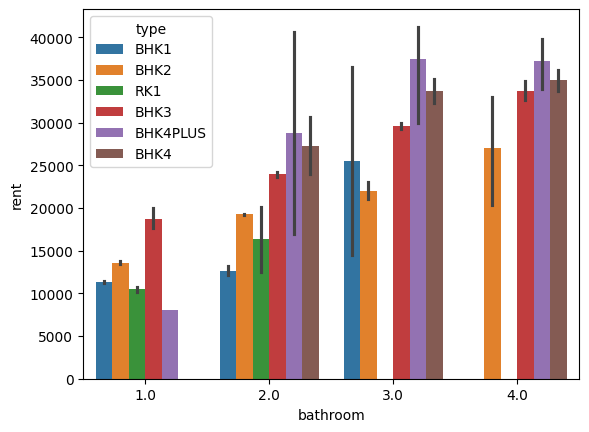

In [5]:
df['type']=df['type'].map({'1BHK1':'BHK1','BHK1':'BHK1',
                           'BHK2':'BHK2','BHK3':'BHK3','bhk2':'BHK2','bhk3':'BHK3',
                           'RK1':'RK1','BHK4':'BHK4','BHK4PLUS':'BHK4PLUS'})
sns.barplot(x = 'bathroom',
            y = 'rent',
            hue='type',
            data = df)
 
# Show the plot
plt.show()

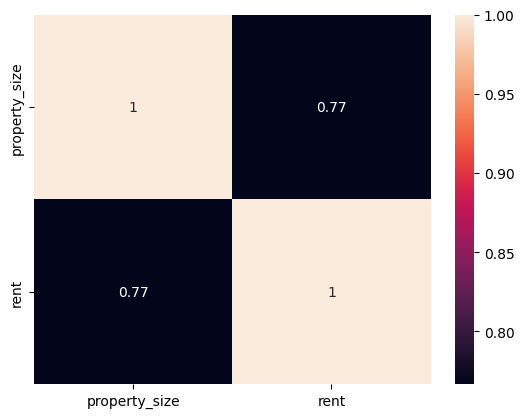

In [6]:
sns.heatmap(df[["property_size","rent"]].corr(), annot=True)
plt.show()

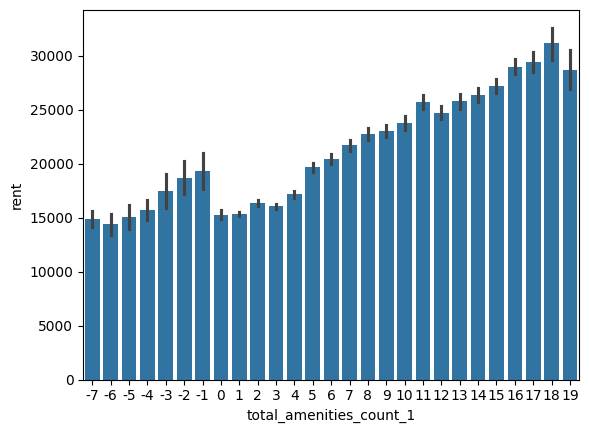

In [7]:
sns.barplot(x="total_amenities_count_1",
                    y="rent",
                    data=df)
plt.show()

## 2. Geospatial Analysis:
- Are there specific localities or neighborhoods where rent prices are generally higher?
- Is there any correlation between latitude/longitude and rent prices?
- How does the availability of amenities like swimming pools, gyms, or parks vary across
  different areas?

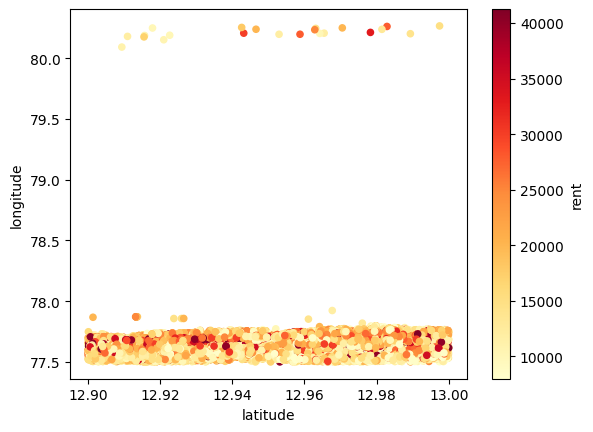

In [8]:
df.plot(x="latitude", y="longitude", kind="scatter", c="rent",
        colormap="YlOrRd")
plt.show()

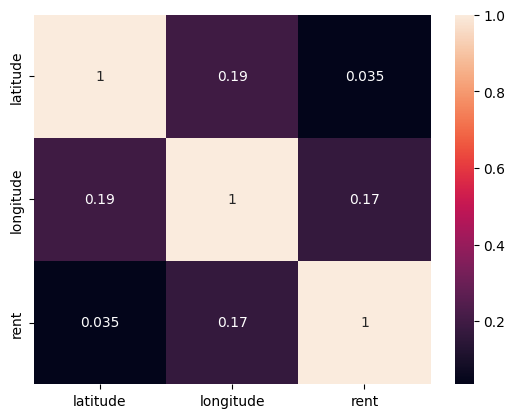

In [9]:
sns.heatmap(df[["latitude",'longitude',"rent"]].corr(), annot=True)
plt.show()

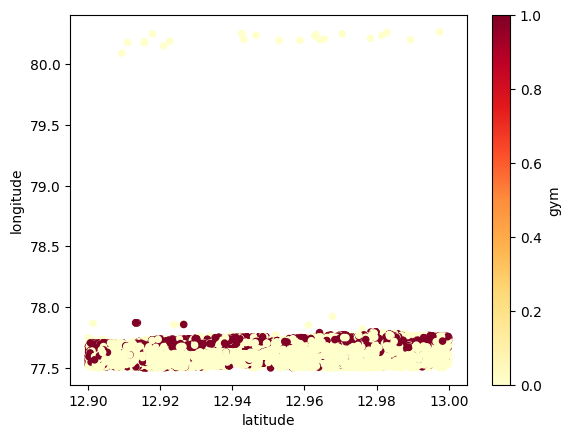

In [10]:
df.plot(x="latitude", y="longitude", kind="scatter", c="gym",
        colormap="YlOrRd")
 # Show the plot
plt.show()

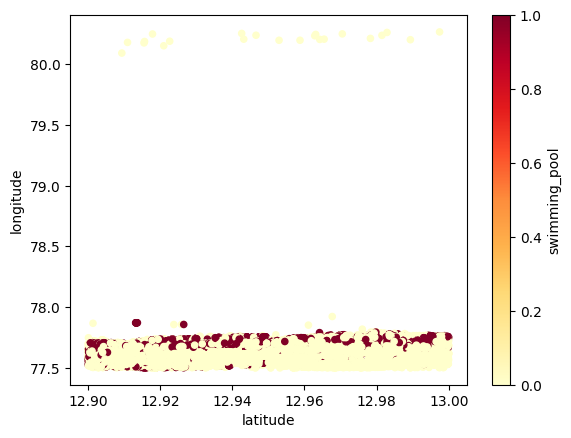

In [11]:
df.plot(x="latitude", y="longitude", kind="scatter", c="swimming_pool",
        colormap='YlOrRd')
 # Show the plot
plt.show()

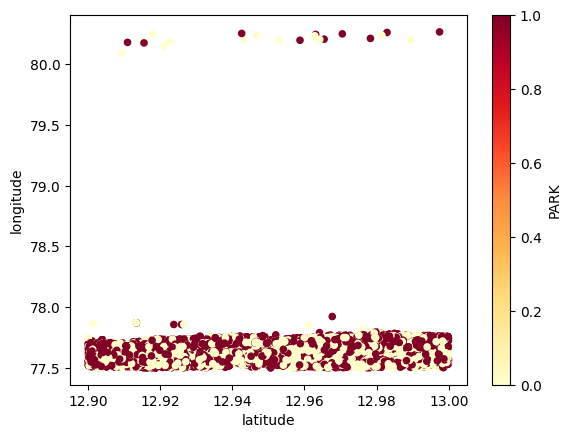

In [12]:
df.plot(x="latitude", y="longitude", kind="scatter", c="PARK",
        colormap='YlOrRd')
 # Show the plot
plt.show()

## 4. Property Features and Rent:
- How does the presence of certain features like a gym, lift, or parking affect the rent price?
- Does the furnishing level (fully furnished, partially furnished, unfurnished) influence the rent?

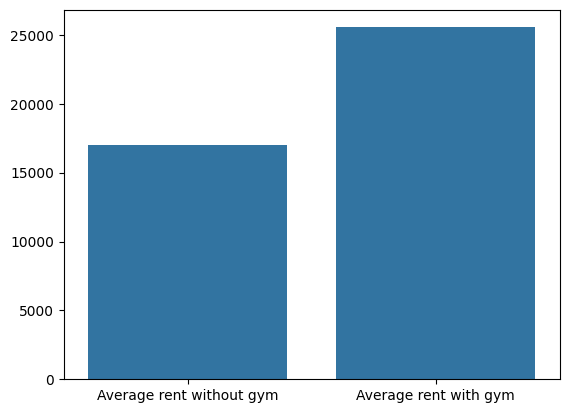

In [15]:
z=[(df.loc[df['gym']==0]['rent']).mean(),(df.loc[df['gym']==1]['rent']).mean()]
k=['Average rent without gym','Average rent with gym']
sns.barplot(x=k,y=z)
plt.show()

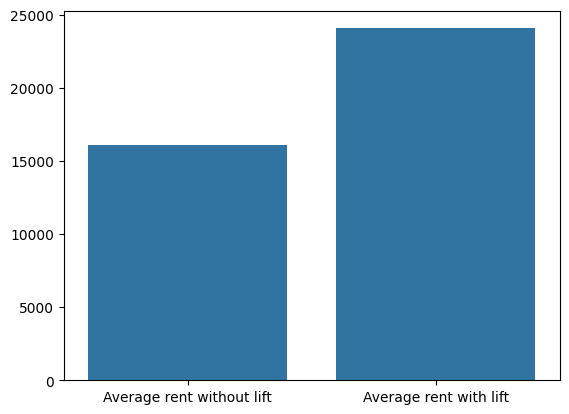

In [16]:
z=[(df.loc[df['lift']==0]['rent']).mean(),(df.loc[df['lift']==1]['rent']).mean()]
k=['Average rent without lift','Average rent with lift']
sns.barplot(x=k,y=z)
plt.show()

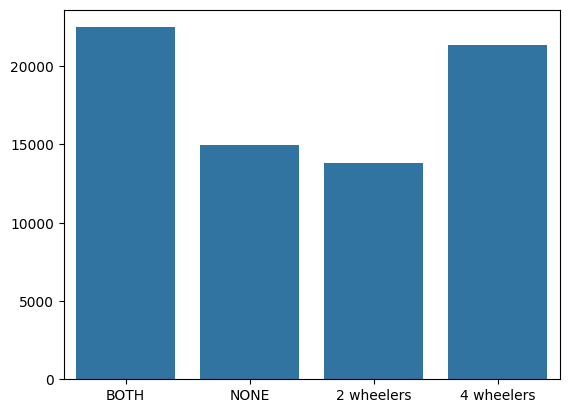

In [17]:
z=[(df.loc[df['parking']=='BOTH']['rent']).mean(),(df.loc[df['parking']=='NONE']['rent']).mean(),
  (df.loc[df['parking']=='TWO_WHEELER']['rent']).mean(),(df.loc[df['parking']=='FOUR_WHEELER']['rent']).mean()]
k=['BOTH','NONE','2 wheelers','4 wheelers']
sns.barplot(x=k,y=z)
plt.show()

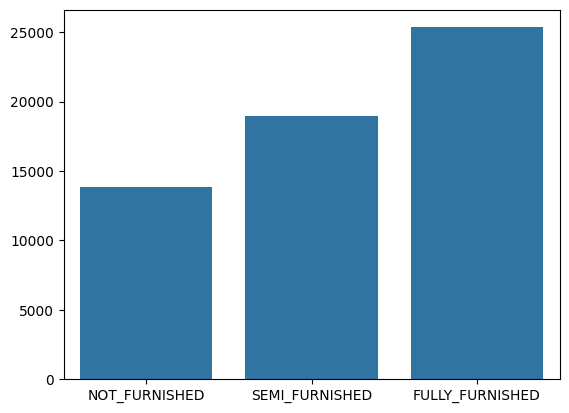

In [18]:
z=[(df.loc[df['furnishing']=='NOT_FURNISHED']['rent']).mean(),(df.loc[df['furnishing']=='SEMI_FURNISHED']['rent']).mean(),
  (df.loc[df['furnishing']=='FULLY_FURNISHED']['rent']).mean()]
k=['NOT_FURNISHED','SEMI_FURNISHED','FULLY_FURNISHED']
sns.barplot(x=k,y=z)
plt.show()

## 5. Building Characteristics:
- Is there a difference in rent prices between high-floors and low-floors buildings?
- How does the number of total floors in a building relate to the rent price?

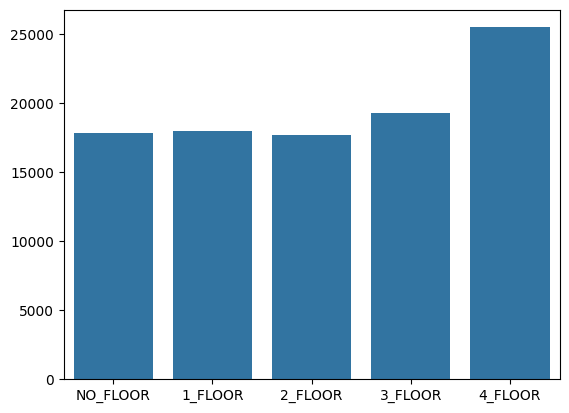

In [19]:
z=[(df.loc[df['floor']==0]['rent']).mean(),(df.loc[df['floor']==1]['rent']).mean(),
  (df.loc[df['floor']==2]['rent']).mean(),(df.loc[df['floor']==3]['rent']).mean(),
    (df.loc[df['floor']==4]['rent']).mean()]
k=['NO_FLOOR','1_FLOOR','2_FLOOR','3_FLOOR','4_FLOOR']
sns.barplot(x=k,y=z)
plt.show()

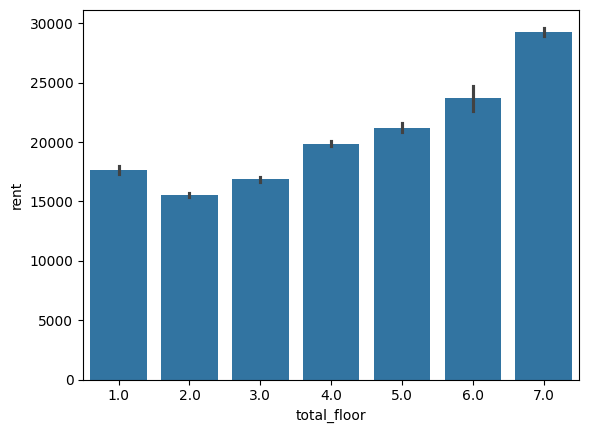

In [20]:
sns.barplot(x='total_floor',y='rent',
                     data=df)
plt.show()

## 6. Negotiability and Rent:
- Do negotiable rent prices tend to be higher or lower than fixed rent prices?
- Is there a difference in rent between family and anyone leases?

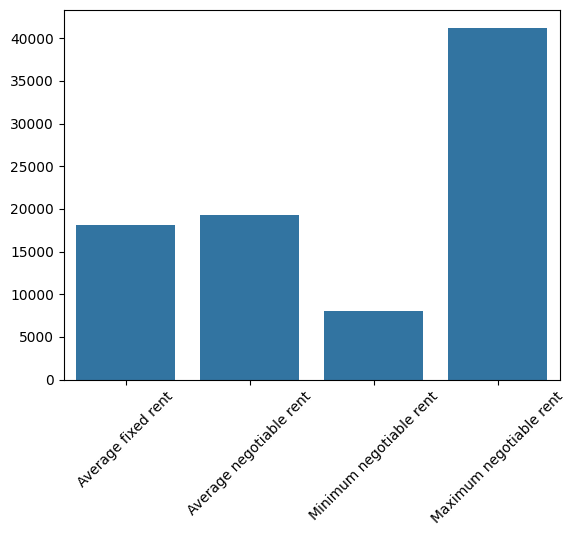

In [24]:
z=[(df.loc[df['negotiable']==0]['rent']).mean(),(df.loc[df['negotiable']==1]['rent']).mean(),
  (df.loc[df['negotiable']==0]['rent']).min(),(df.loc[df['negotiable']==1]['rent']).max()]
k=['Average fixed rent','Average negotiable rent','Minimum negotiable rent','Maximum negotiable rent']
sns.barplot(x=k,y=z)
plt.xticks(rotation=45)
plt.show()

In [25]:
df['lease_type'].unique()

array(['ANYONE', 'FAMILY', 'BACHELOR', 'COMPANY'], dtype=object)

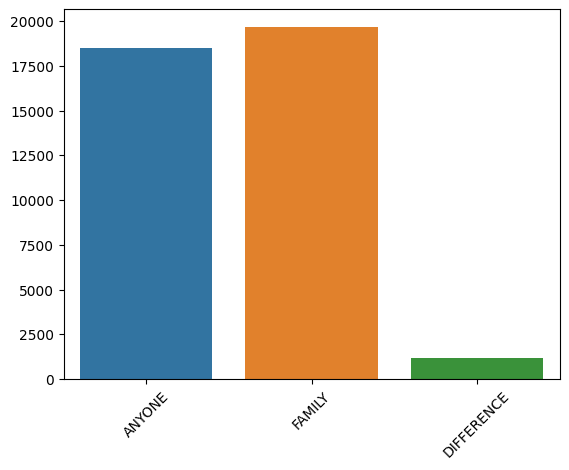

Difference of average_amount between lease_types "ANYONE" and FAMILY: 1177.2862533491825


In [26]:
z=[(df.loc[df['lease_type']=='ANYONE']['rent']).mean(),(df.loc[df['lease_type']=='FAMILY']['rent']).mean(),
  abs(((df.loc[df['lease_type']=='ANYONE']['rent']).mean()-(df.loc[df['lease_type']=='FAMILY']['rent']).mean()))]
k=['ANYONE','FAMILY','DIFFERENCE']
sns.barplot(x=k,y=z,hue=['ANYONE','FAMILY','DIFFERENCE'])
plt.xticks(rotation=45)
plt.show()
print('Difference of average_amount between lease_types "ANYONE" and FAMILY:',abs(((df.loc[df['lease_type']=='ANYONE']['rent']).mean()-(df.loc[df['lease_type']=='FAMILY']['rent']).mean())))

## 7. Balconies and Rent:
- How does the number of balconies in a property impact its rent price?
- Is there a correlation between the property's facing direction and rent price?

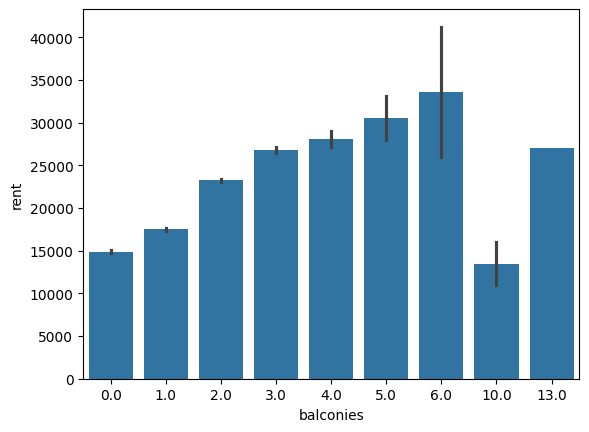

In [27]:
sns.barplot(x='balconies',y='rent',
                     data=df)
plt.show()

In [34]:
df['facing']=df['facing'].map({'N':17957.120877,
'S' :    18511.189100,
'E' :   19042.824034,
'W' :    20458.607745,
'NE' :   21664.501235,
'NW' :   21949.664430,
'SE' :   22021.979275,
'SW' :   24813.559322})

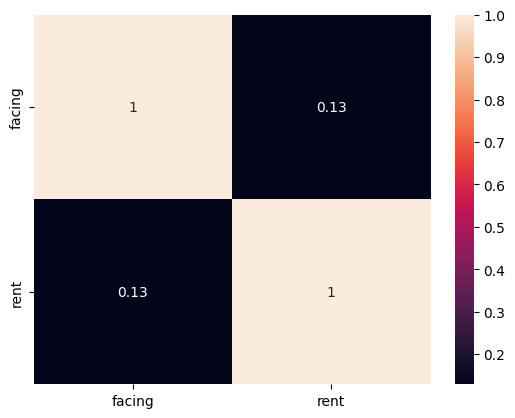

In [36]:
sns.heatmap(df[['facing',"rent"]].corr(), annot=True)
plt.show()

## 8. Amenities and Rent:
- Are certain amenities more strongly correlated with higher rent prices?
- How does the availability of amenities like swimming pools or gyms affect rent?

In [37]:
df.columns

Index(['Unnamed: 0', 'id', 'type', 'locality', 'activation_date', 'latitude',
       'longitude', 'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'water_supply',
       'building_type', 'balconies', 'rent', 'rent_level', 'LIFT', 'GYM',
       'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS', 'SERVANT',
       'SECURITY', 'SC', 'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP',
       'total_amenities_count_1'],
      dtype='object')

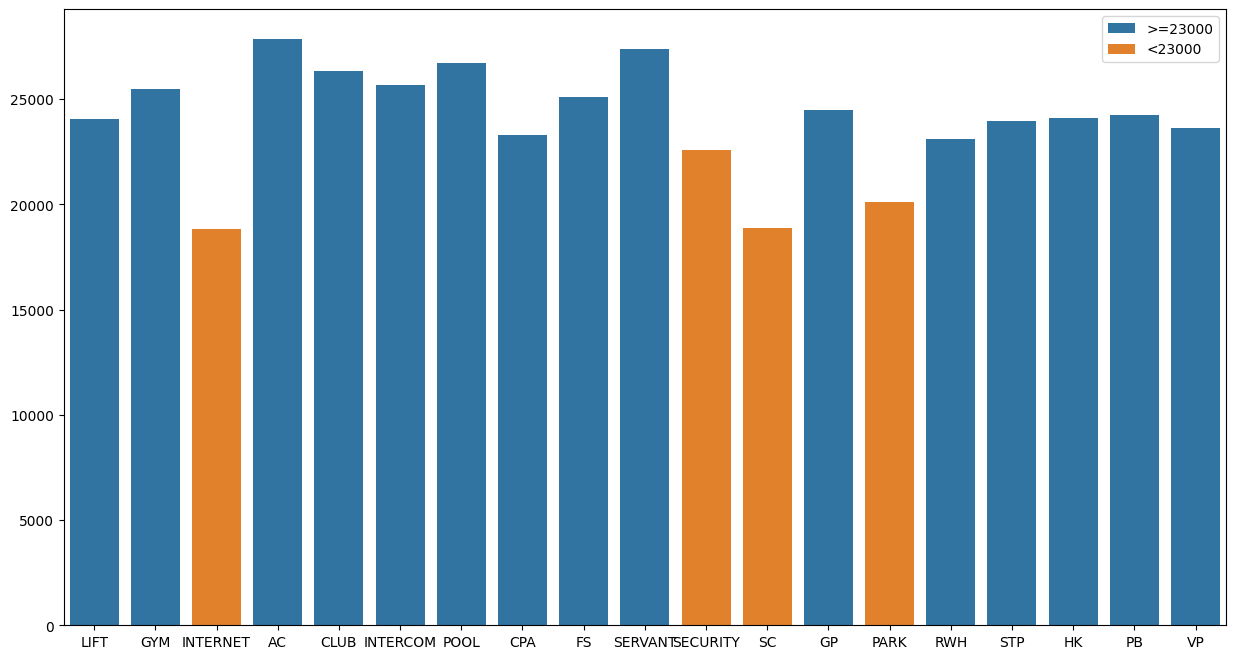

In [40]:
s=['LIFT', 'GYM',
       'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS', 'SERVANT',
       'SECURITY', 'SC', 'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP']
s1=[]
s2=[]
s3=[]
for i in s:
    f=(df.loc[df[i]==1]['rent']).mean() #grouping the rows in which any particular amenity is available
    s1.append(i)
    s2.append(f)
    if f>=23000:
        s3.append('>=23000')
    else:
        s3.append('<23000')
plt.figure(figsize=(15,8))
sns.barplot(x=s1,y=s2,hue=s3)
plt.show()

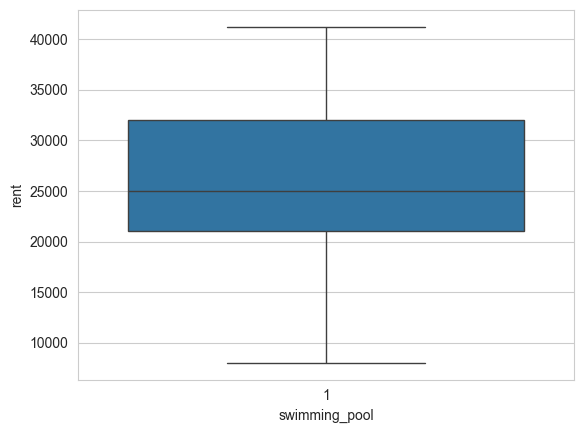

26743.693389592125


In [47]:
f=(df.loc[df['swimming_pool']==1])

sns.set_style("whitegrid") 
  
sns.boxplot(x = 'swimming_pool', y = 'rent', data = f) 
plt.show()
print(f['rent'].mean())

## 9. Water Supply and Building Type:
- Do properties with certain types of water supply tend to have higher rent?
- Does the building type (e.g., IH, AP) have an influence on rent prices?

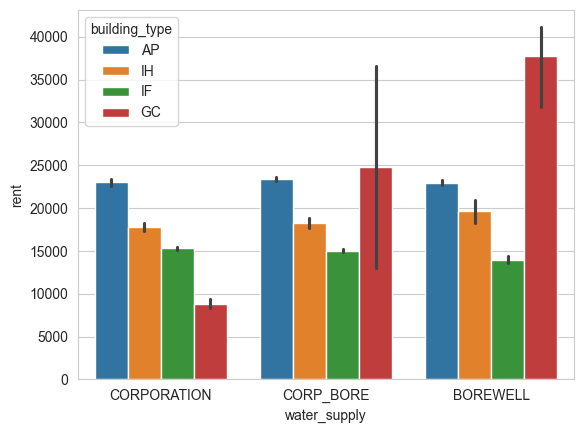

In [49]:
sns.barplot(x='water_supply',y='rent',hue='building_type',
                     data=df)
plt.show()

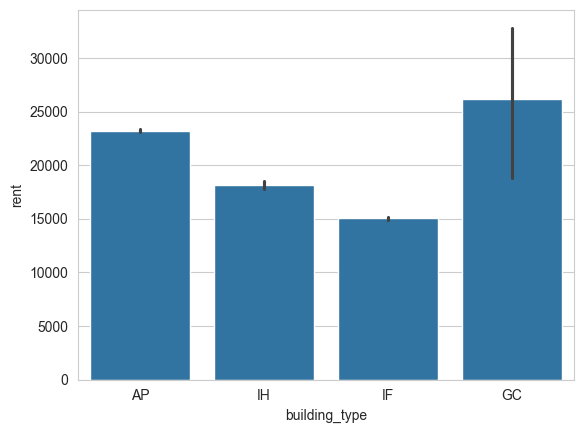

In [50]:
sns.barplot(x='building_type',y='rent',
                     data=df)
plt.show()

## 10. Predictive Analysis:
- Can we build a predictive model to accurately estimate rent prices based on the given
attributes?
- Which features have the most significant impact on rent predictions according to the model?

### Most of the features in the dataset have very less correlation with the target variable('rent').We can drop those columns and select only the most important columns using SHAP Analysis

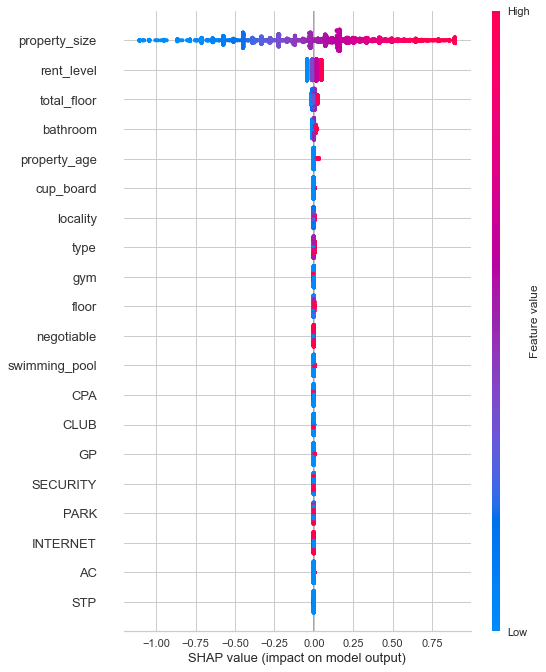

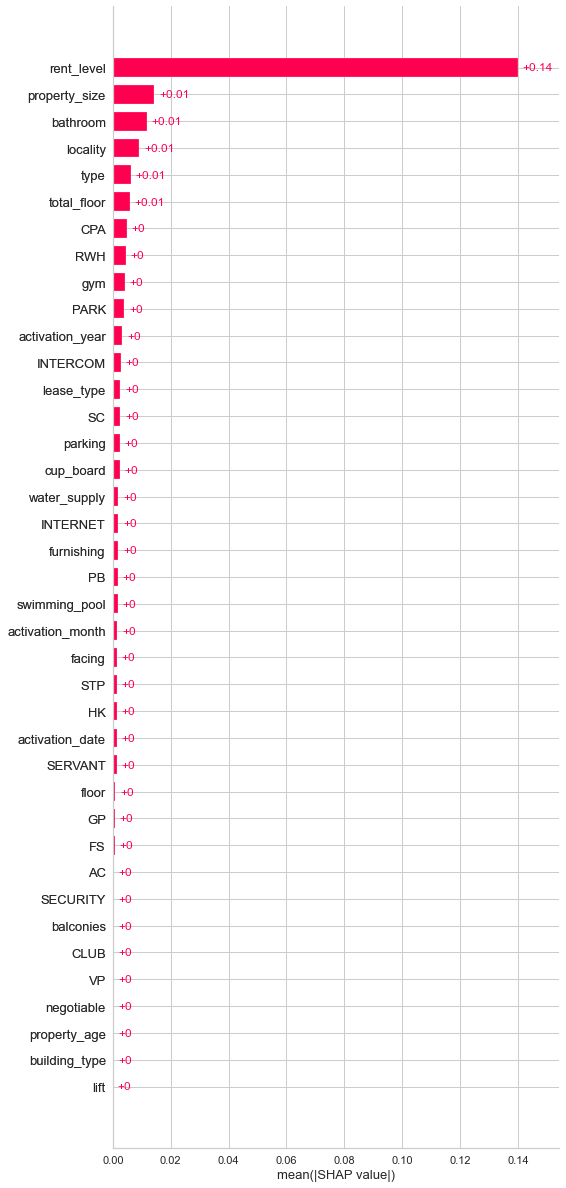

### I had a total of 47 features after cleaning the dataset and creating new features.So to have a more optimized dataset I will use only the important features that I got through SHAP Analysis.To build the ML models I will use only the selected 22 features.